# Face Detection 

In [1]:
#!pip install mtcnn

In [2]:
#!pip install keras_vggface

In [3]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN #multi task convoluted neural network

Using TensorFlow backend.


In [4]:
from matplotlib.patches import Rectangle

In [5]:
from numpy import asarray
from PIL import Image 
# PIL can be pretty buggy and bothersome in installation
# dont worry too much if it fails , we use it for face extraction , there can be otherways

In [10]:
image_path=r'C:\Users\SAIKRISHNA PULIPATI\Desktop\ED_DEEP LEARNING\2. AI Application_Face detection, extraction, recognization\face_recog_images\Indian-cricket-team-world-cup-team.jpg'
image=plt.imread(image_path)

In [11]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)



{'box': [110, 30, 66, 80], 'confidence': 0.9999890327453613, 'keypoints': {'left_eye': (128, 62), 'right_eye': (159, 60), 'nose': (144, 75), 'mouth_left': (131, 91), 'mouth_right': (159, 89)}}
{'box': [364, 104, 30, 34], 'confidence': 0.9999833106994629, 'keypoints': {'left_eye': (369, 114), 'right_eye': (383, 113), 'nose': (374, 122), 'mouth_left': (370, 129), 'mouth_right': (382, 130)}}
{'box': [531, 114, 24, 29], 'confidence': 0.9992170333862305, 'keypoints': {'left_eye': (535, 123), 'right_eye': (546, 122), 'nose': (539, 129), 'mouth_left': (535, 136), 'mouth_right': (545, 136)}}
{'box': [462, 105, 24, 28], 'confidence': 0.9975016713142395, 'keypoints': {'left_eye': (475, 115), 'right_eye': (485, 117), 'nose': (482, 123), 'mouth_left': (473, 127), 'mouth_right': (480, 129)}}
{'box': [725, 115, 25, 29], 'confidence': 0.9972932934761047, 'keypoints': {'left_eye': (736, 123), 'right_eye': (747, 122), 'nose': (745, 130), 'mouth_left': (737, 137), 'mouth_right': (746, 136)}}
{'box': [

In [12]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

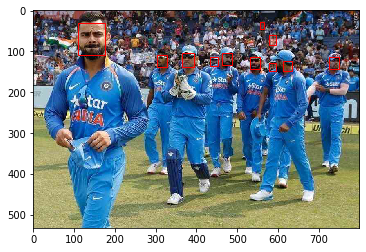

In [13]:
highlight_faces(image_path,faces)

In [14]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image(image_path)

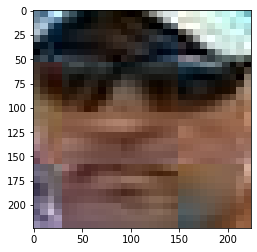

In [18]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[1])
plt.show()

# Face Recognition

In [56]:
# you can use data base from here : http://vision.ucsd.edu/content/yale-face-database 
# popularly known as yale faces

In [57]:
# tons of interesting datasets here : http://homepages.inf.ed.ac.uk/rbf/CVonline/Imagedbase.htm#face

In [172]:
faces_path=r'face_recog_images/face_recog_data/train/'

In [173]:
import os

In [174]:
files=os.listdir(faces_path)

In [175]:
files

['arvind-kejriwal-sushma-swaraj.jpg',
 'jaya.jpg',
 'modi_rahul.jpg',
 'smriti_irani.jpeg',
 'yadavs.jpg',
 'yedyurappa.jpg',
 'YS-Jagan-Mohan-Reddy.jpg']

In [176]:
files=[x for x in files if x[0]!='.'] # to remove system files 

In [177]:
stored_faces=[]

In [178]:
for file in files:
    extracted_face = extract_face_from_image(faces_path+file)
    for face in extracted_face:
        stored_faces.append(face)

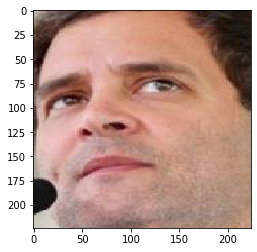

In [179]:
plt.imshow(stored_faces[3])
plt.show()

In [180]:
names=['BS yediyurappa','akhilesh yadav','dimple yadav',
       'jaganmohan reddy','arvind kejriwal','sushma swaraj',
      'jayalalitha','smriti irani','rahul gandhi','narendra modi']

In [181]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [182]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)


stored_faces_embeddings = get_model_scores(stored_faces)

In [183]:
stored_faces_embeddings.shape

(10, 2048)

In [184]:
stored_faces_embeddings_dict=dict(zip(names,stored_faces_embeddings))

In [185]:
def get_match(face_score):
    
    no_match=True
    
    for i,j in stored_faces_embeddings_dict.items():
        if cosine(face_score,j)<0.4:
            print(i)
            no_match=False
    if no_match:
        print('No Match')
    

In [186]:
## lets match 

In [187]:
test_file=r'face_recog_images/face_recog_data/test/test_pol1.jpg'

In [188]:
image=plt.imread(test_file)

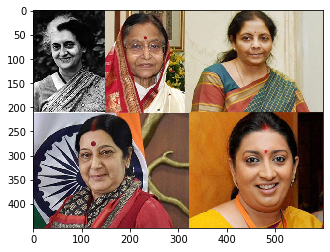

In [189]:
plt.imshow(image)

In [190]:
faces_in_image=extract_face_from_image(test_file)

In [191]:
face_scores=get_model_scores(faces_in_image)

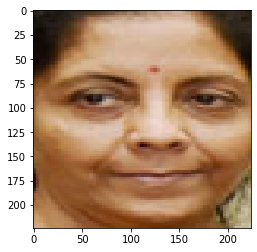

In [192]:
plt.imshow(faces_in_image[2])
plt.show()

In [193]:
get_match(face_scores[2])

No Match


In [194]:
test_file=r'face_recog_images/face_recog_data/test/test_pol2.jpg'

In [195]:
image=plt.imread(test_file)

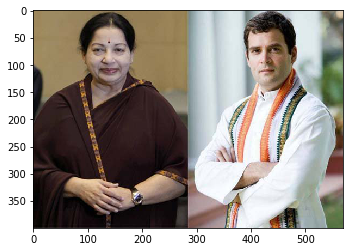

In [196]:
plt.imshow(image)

In [197]:
faces_in_image=extract_face_from_image(test_file)

In [198]:
face_scores=get_model_scores(faces_in_image)

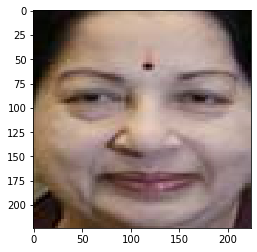

In [201]:
plt.imshow(faces_in_image[0])
plt.show()

In [202]:
get_match(face_scores[0])

dimple yadav
